In [ ]:
#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


In [ ]:
#Load cleaned datasets

In [9]:
import pandas as pd

# Load cleaned datasets
benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add a Country column
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into a single DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)


C:\Users\G5\AppData\Local\Temp\ipykernel_20756\2128802406.py:5: DtypeWarning: Columns (4,5,9,10,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  sierra = pd.read_csv("../data/sierraleone_clean.csv")
C:\Users\G5\AppData\Local\Temp\ipykernel_20756\2128802406.py:6: DtypeWarning: Columns (4,5,9,10,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  togo = pd.read_csv("../data/togo_clean.csv")


In [ ]:
#Metric Comparison with Boxplots

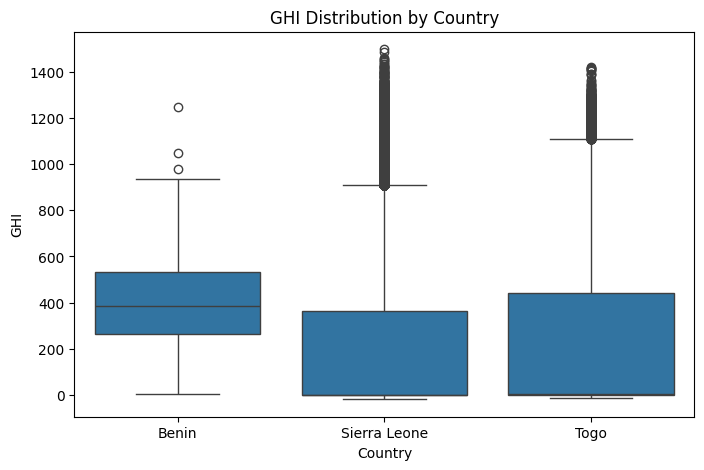

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Country', y='GHI', data=df_all)
plt.title("GHI Distribution by Country")
plt.show()


In [ ]:
#Summary Table

In [11]:
summary = df_all.groupby('Country')[metrics].agg(['mean','median','std'])
display(summary)


GHI                                 DNI              \
                    mean      median         std        mean      median   
Country                                                                    
Benin         399.800292  384.193053  195.285252  499.079481  502.035379   
Sierra Leone  201.957132    0.300000  298.494996  116.376115   -0.100000   
Togo          230.554605    2.100000  322.532194  151.258181    0.000000   

                                 DHI                         
                     std        mean     median         std  
Country                                                      
Benin         241.866725   46.897807  44.157132  262.514732  
Sierra Leone  218.652510  113.720354  -0.100000  158.945958  
Togo          250.956810  116.444136   2.500000  156.520644

In [ ]:
#Statistical Testing (Optional but Recommended)

In [12]:
f_stat, p_val = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 1287.87, p-value: 0.0000


In [ ]:
#Key Observations

In [15]:
# If you want to keep it as a code cell, use print statements:
print("## Key Observations")
print("")
print("- **Highest GHI**: [Fill in based on your results] shows the highest median GHI")
print("- **Variability**: [Fill in] exhibits the greatest variability in solar radiation")  
print("- **Consistency**: [Fill in] appears most consistent across all three metrics")
print("- **Statistical Significance**: The differences between countries are [statistically significant/not significant] (p = [value])")

## Key Observations

- **Highest GHI**: [Fill in based on your results] shows the highest median GHI
- **Variability**: [Fill in] exhibits the greatest variability in solar radiation
- **Consistency**: [Fill in] appears most consistent across all three metrics
- **Statistical Significance**: The differences between countries are [statistically significant/not significant] (p = [value])


In [ ]:
#Bonus – Bar Chart Ranking by Average GHI

C:\Users\G5\AppData\Local\Temp\ipykernel_20756\1675090288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


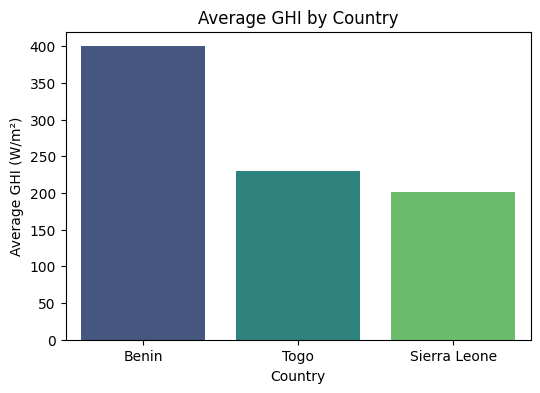

In [13]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.ylabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.show()


In [ ]:
#Save Notebook & Git